I. Set Up

In [56]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
import hepstats
from hepstats import *
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from data_exploration_functions import *
from data_extraction_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[1],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', index=1, options=('All', 'Bona'), value='Bona')

II. Load Data

In [41]:
from matplotlib.colors import LogNorm
from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')

df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

#print("ObsID and RegID: ", df_eventfiles_group.groups.keys())

Number of Eventfiles:  82283
Number of Property Sets:  82283


In [87]:
all_ids = list(df_eventfiles_group.groups.keys())
# all_names = list(df_properties_global['name'])
flares = ['4395_992','16444_1025','2227_220','9518_47','9109_333','9109_344','13637_1078','14368_489','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29']
dips = ['10783_10','10871_10','11059_10','9070_10','9072_10','13814_567','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86']
newfound = ['10346_11','10542_331','10542_331','10545_496','10556_5752','10556_6687','10811_223','10821_241', '1878_331','10930_1050','10953_275','10956_64']
somename = ['10542_331','10545_338','10544_380']
filtered_ids = [id for id in all_ids if id.split('_')[1] == '2']
# filtered_name = [name for name in all_names if name == '2CXO J095700.2+693419']
keep = dips + flares
# keep = filtered_ids
keep = newfound
# name = ['2CXO J122829.7+014147']
#keep_obsreg = ['10995_21','13814_567']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(keep)]
# df_properties_anomalies = df_properties_global[df_properties_global['name'].isin(name)]
df_properties_anomalies.head(50)

# 1712_91

name          ra        dec  err_ellipse_r0  \
37261   2CXO J054052.4-020045   85.218708  -2.012763        1.856026   
46754   2CXO J090646.3+045107  136.693053   4.852043        0.871806   
49572   2CXO J095554.9+694025  148.979026  69.673801        0.715190   
49778   2CXO J095700.2+693419  149.250847  69.572010        0.768490   
95435   2CXO J174538.2-285602  266.409530 -28.934005        0.723130   
95588   2CXO J174540.0-290028  266.416843 -29.007799        0.710133   
97286   2CXO J174834.6-271418  267.144179 -27.238506        0.734041   
105491  2CXO J193501.5+303632  293.756482  30.609009        1.146370   
107467  2CXO J203242.1+412748  308.175543  41.463524        0.731347   
107702  2CXO J203309.8+411248  308.291069  41.213338        0.722418   
112932  2CXO J225355.0+624337  343.479361  62.726990        0.717214   

        err_ellipse_r1  err_ellipse_ang  significance likelihood_class  \
37261         1.018314       166.700647     27.553140             TRUE   
46754         0.783024        92.218364      5.142857             TRUE   
49572         0.715196         0.000000      9.309312             TRUE   
49778         0.741997         6.552927     36.386730             TRUE   
95435         0.715309        34.255231     13.596878             TRUE   
95588         0.710019       119.029984    107.911118             TRUE   
97286         0.714800       167.369284     29.299954             TRUE   
105491        0.852892        87.861946     10.347769             TRUE   
107467        0.725849       102.600127     13.712025             TRUE   
107702        0.715256       155.903121     11.962552             TRUE   
112932        0.713027        53.352135     60.591488             TRUE   

        conf_flag  sat_src_flag  ...  hard_hs_hilim  var_prob_b  var_prob_h  \
37261       False         False  ...      -0.671455    1.000000    0.459234   
46754       False         False  ...       0.237976    0.327984    0.535741   
49572        True         False  ...      -0.906309    0.050884         NaN   
49778       False         False  ...      -0.599001    1.000000    1.000000   
95435       False         False  ...       0.194254    1.000000    1.000000   
95588        True         False  ...       0.996252    1.000000    1.000000   
97286       False         False  ...      -0.716427    1.000000         NaN   
105491      False         False  ...      -0.372892    1.000000    1.000000   
107467       True         False  ...      -0.661462    1.000000         NaN   
107702      False         False  ...       0.856340    1.000000    1.000000   
112932      False         False  ...       0.937539    1.000000    1.000000   

        var_prob_m  var_prob_s  var_index_b  var_index_w       livetime  \
37261     0.843907    0.999999          8.0          NaN   75457.853105   
46754     0.400414    0.882306          0.0          NaN   15936.415412   
49572          NaN    0.059045          0.0          NaN   95042.207517   
49778     1.000000    1.000000         10.0          NaN  118607.450363   
95435     1.000000    0.984515          9.0          NaN  112558.051197   
95588          NaN         NaN         10.0          NaN  112545.691769   
97286     0.999998    1.000000          9.0          NaN   82127.514319   
105491    1.000000    1.000000         10.0          NaN   38627.798341   
107467    1.000000    1.000000         10.0          NaN   28889.317503   
107702    1.000000    0.840824         10.0          NaN   27682.166940   
112932    0.905767    0.243407          9.0          NaN   24402.501596   

        detector   obsreg_id  
37261     ACIS-7    1878_331  
46754     ACIS-7    10346_11  
49572     ACIS-7   10545_496  
49778     ACIS-6   10542_331  
95435     ACIS-2  10556_5752  
95588     ACIS-3  10556_6687  
97286     ACIS-6  10930_1050  
105491    ACIS-6   10821_241  
107467    ACIS-6   10953_275  
107702    ACIS-0    10956_64  
112932    ACIS-2   10811_223  

[11 rows x 76 columns]

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0               1           1             0           0
750.0             5           4             0           1
1500.0            2           1             0           1
2250.0            2           0             1           1
3000.0            2           1             1           0
        broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                      
0.0               1           1             0           0    NaN   -1.0   
750.0             5           4             0           1    1.0   -0.6   
1500.0            2           1             0           1    1.0    0.0   
2250.0            2           0             1           1    0.0    1.0   
3000.0            2           1             1           0   -1.0   -1.0   

        hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time               

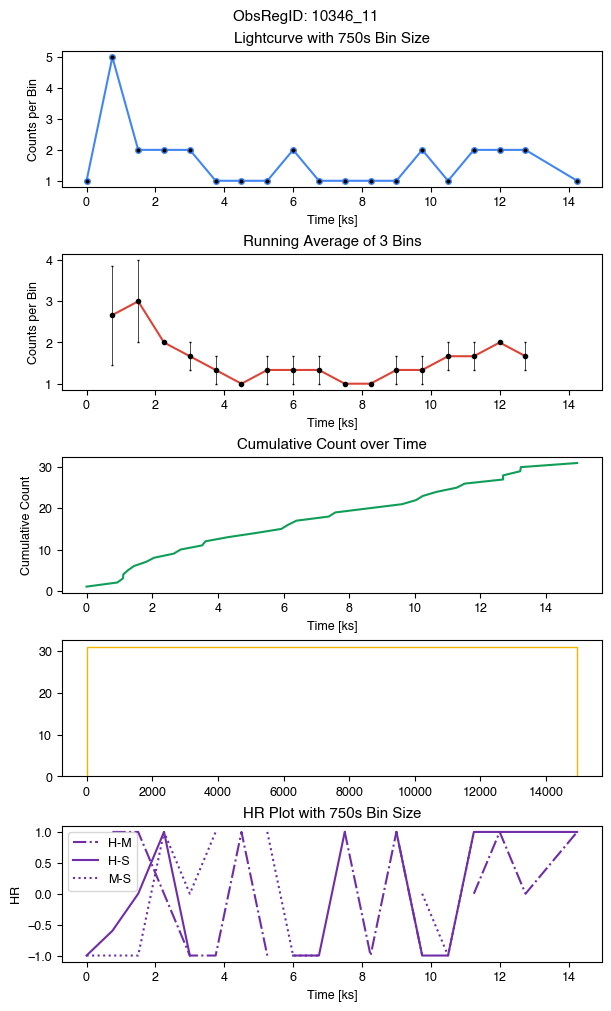

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0               1           1             0           0
750.0             1           1             0           0
1500.0            2           0             1           1
2250.0            1           0             0           1
3750.0            2           2             0           0
        broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                      
0.0               1           1             0           0    NaN   -1.0   
750.0             1           1             0           0    NaN   -1.0   
1500.0            2           0             1           1    0.0    1.0   
2250.0            1           0             0           1    1.0    1.0   
3750.0            2           2             0           0    NaN   -1.0   

        hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time               

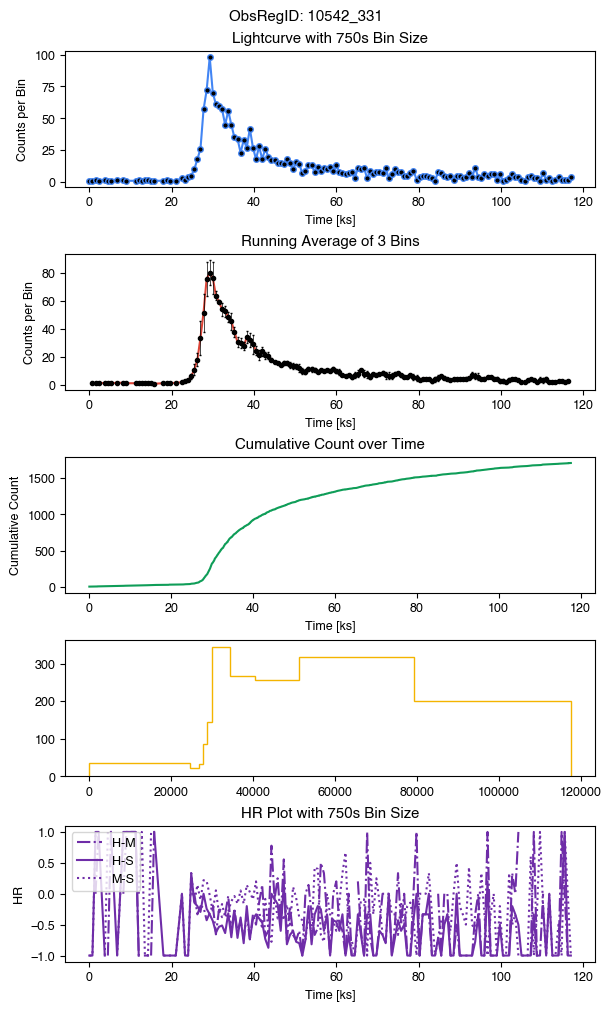

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0               3           1             2           0
750.0             2           2             0           0
1500.0            3           1             1           1
2250.0            2           2             0           0
3750.0            4           3             1           0
        broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                      
0.0               3           1             2           0   -1.0   -1.0   
750.0             2           2             0           0    NaN   -1.0   
1500.0            3           1             1           1    0.0    0.0   
2250.0            2           2             0           0    NaN   -1.0   
3750.0            4           3             1           0   -1.0   -1.0   

           hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time            

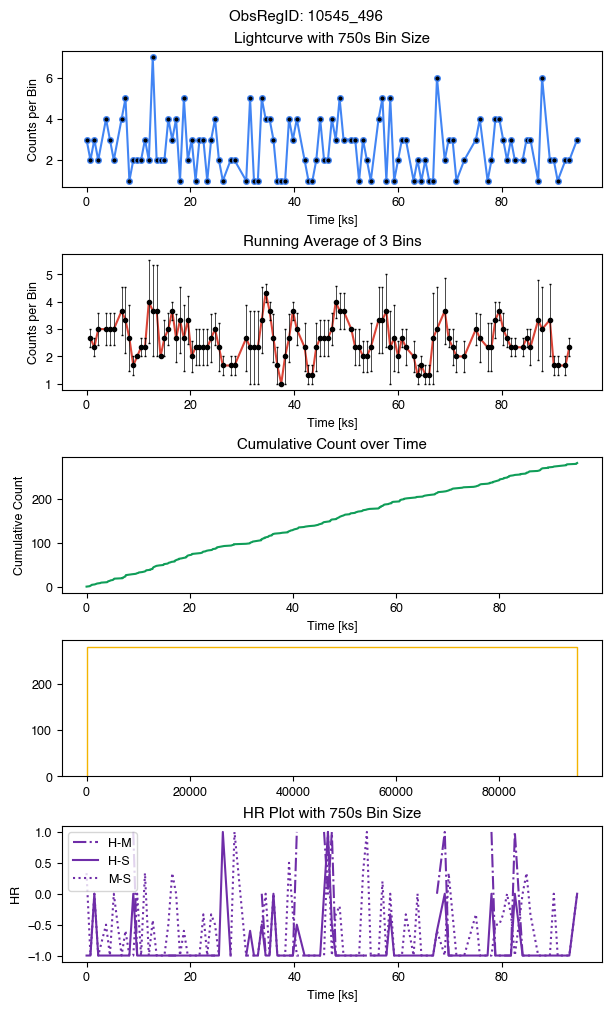

         broad_count  soft_count  medium_count  hard_count
time                                                      
0.0                2           1             0           1
6000.0             1           0             0           1
24750.0            1           1             0           0
27000.0            1           1             0           0
43500.0            1           0             1           0
         broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                       
0.0                2           1             0           1    1.0    0.0   
6000.0             1           0             0           1    1.0    1.0   
24750.0            1           1             0           0    NaN   -1.0   
27000.0            1           1             0           0    NaN   -1.0   
43500.0            1           0             1           0   -1.0    NaN   

         hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time

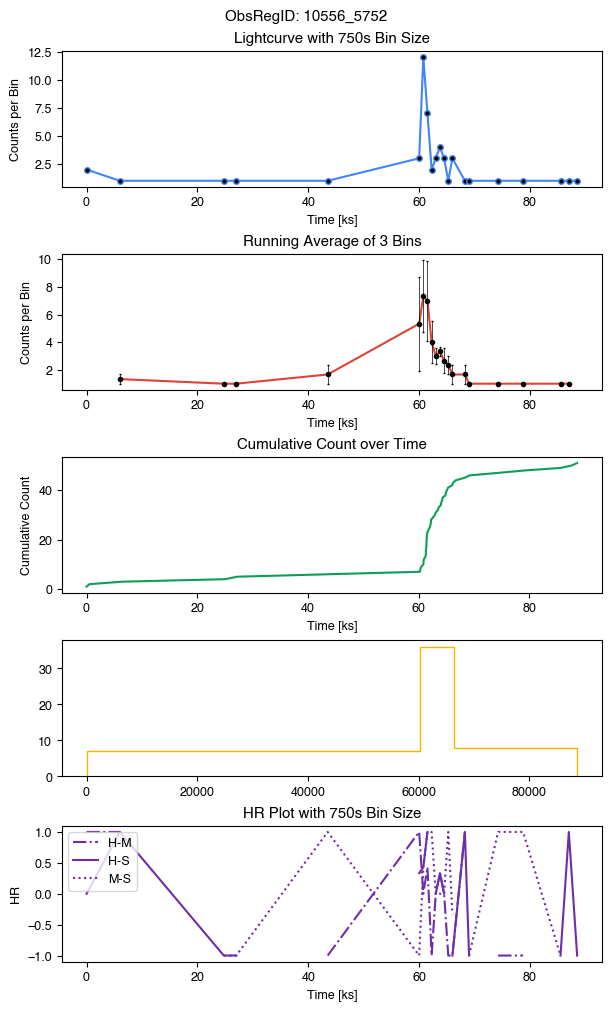

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0              28           0             0          28
750.0            21           0             0          21
1500.0            4           0             0           4
2250.0            7           0             0           7
3000.0            7           0             0           7
        broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                      
0.0              28           0             0          28    1.0    1.0   
750.0            21           0             0          21    1.0    1.0   
1500.0            4           0             0           4    1.0    1.0   
2250.0            7           0             0           7    1.0    1.0   
3000.0            7           0             0           7    1.0    1.0   

        hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time               

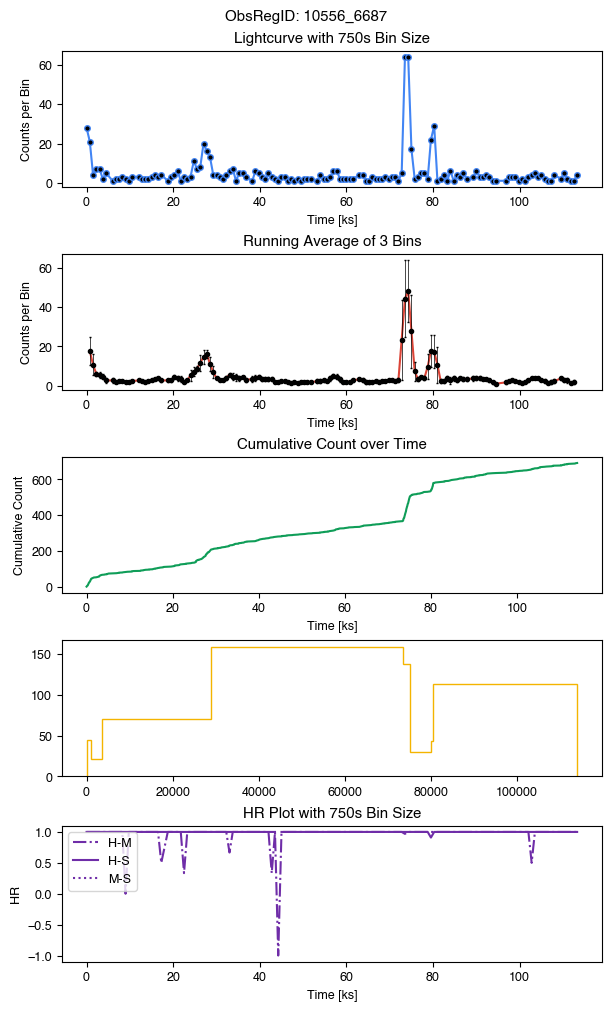

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0              41           0            12          29
750.0            30           0             6          24
1500.0           36           2             3          31
2250.0           69           2            19          48
3000.0           38           1             8          29
        broad_count  soft_count  medium_count  hard_count     hr_hm     hr_hs  \
time                                                                            
0.0              41           0            12          29  0.414634  1.000000   
750.0            30           0             6          24  0.600000  1.000000   
1500.0           36           2             3          31  0.823529  0.878788   
2250.0           69           2            19          48  0.432836  0.920000   
3000.0           38           1             8          29  0.567568  0.933333   

           hr_ms  hr_hm_lo

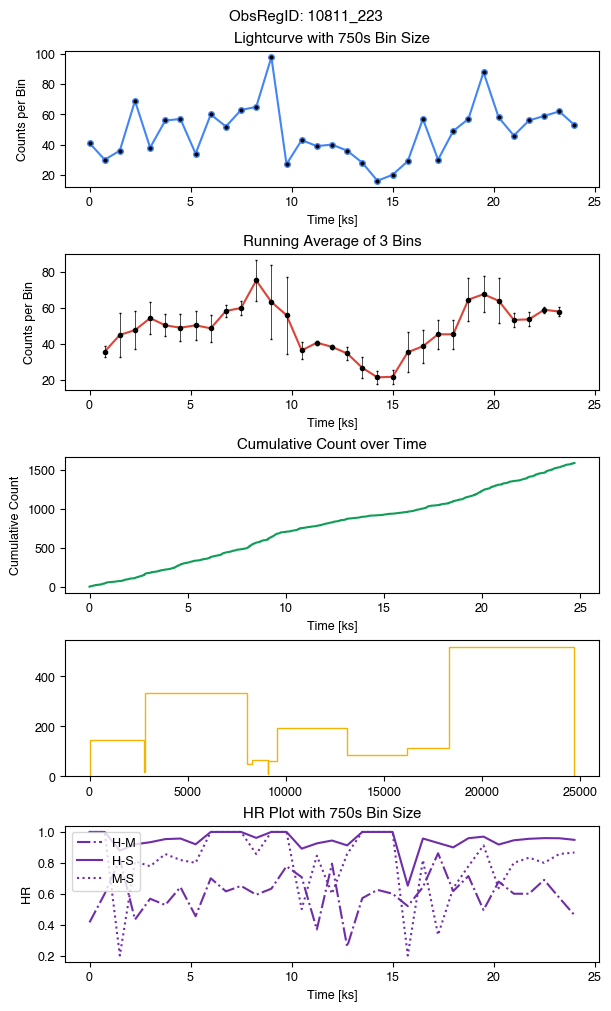

         broad_count  soft_count  medium_count  hard_count
time                                                      
0.0                1           1             0           0
750.0              1           0             0           1
5250.0             1           1             0           0
12000.0            1           1             0           0
19500.0            1           0             1           0
         broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                       
0.0                1           1             0           0    NaN   -1.0   
750.0              1           0             0           1    1.0    1.0   
5250.0             1           1             0           0    NaN   -1.0   
12000.0            1           1             0           0    NaN   -1.0   
19500.0            1           0             1           0   -1.0    NaN   

         hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time

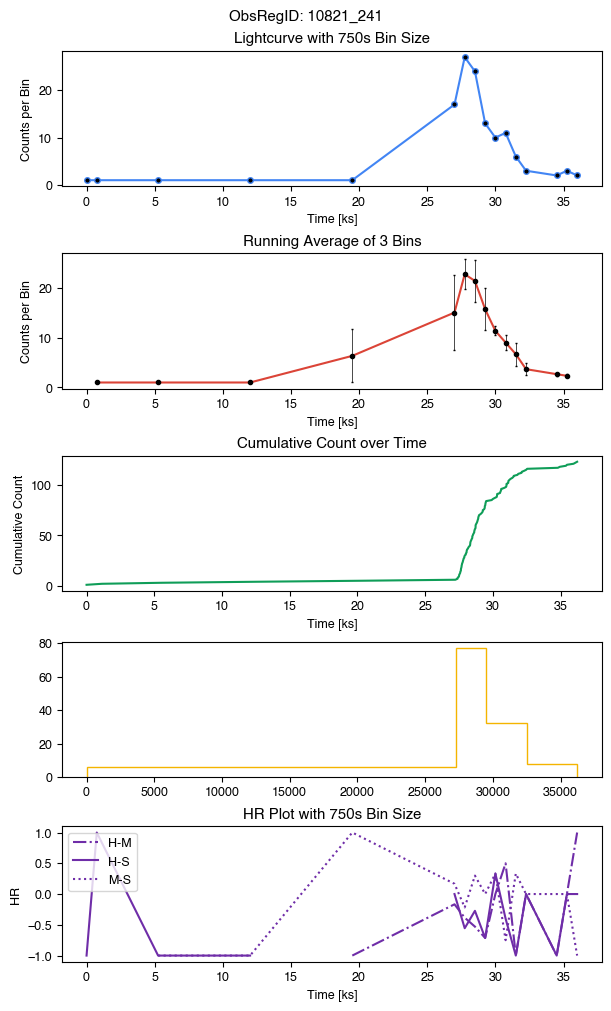

         broad_count  soft_count  medium_count  hard_count
time                                                      
0.0                1           0             1           0
750.0              2           1             1           0
4500.0             1           1             0           0
14250.0            1           0             1           0
20250.0            1           1             0           0
         broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                       
0.0                1           0             1           0   -1.0    NaN   
750.0              2           1             1           0   -1.0   -1.0   
4500.0             1           1             0           0    NaN   -1.0   
14250.0            1           0             1           0   -1.0    NaN   
20250.0            1           1             0           0    NaN   -1.0   

         hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time

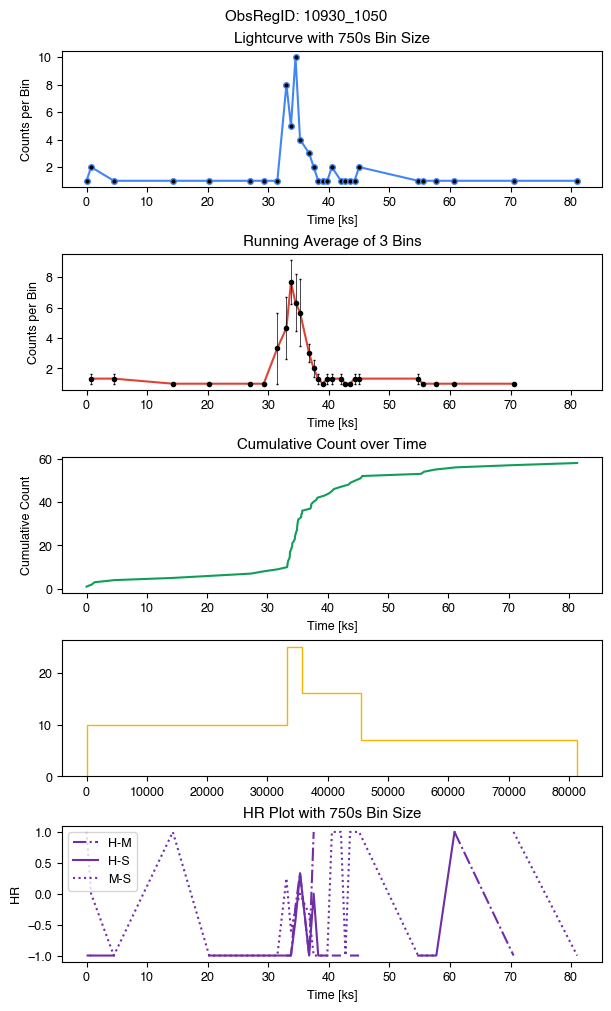

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0               5           3             1           1
750.0            10           4             0           6
1500.0            5           1             0           4
2250.0            9           2             3           4
3000.0            3           1             0           2
        broad_count  soft_count  medium_count  hard_count     hr_hm     hr_hs  \
time                                                                            
0.0               5           3             1           1  0.000000 -0.500000   
750.0            10           4             0           6  1.000000  0.200000   
1500.0            5           1             0           4  1.000000  0.600000   
2250.0            9           2             3           4  0.142857  0.333333   
3000.0            3           1             0           2  1.000000  0.333333   

        hr_ms  hr_hm_log  

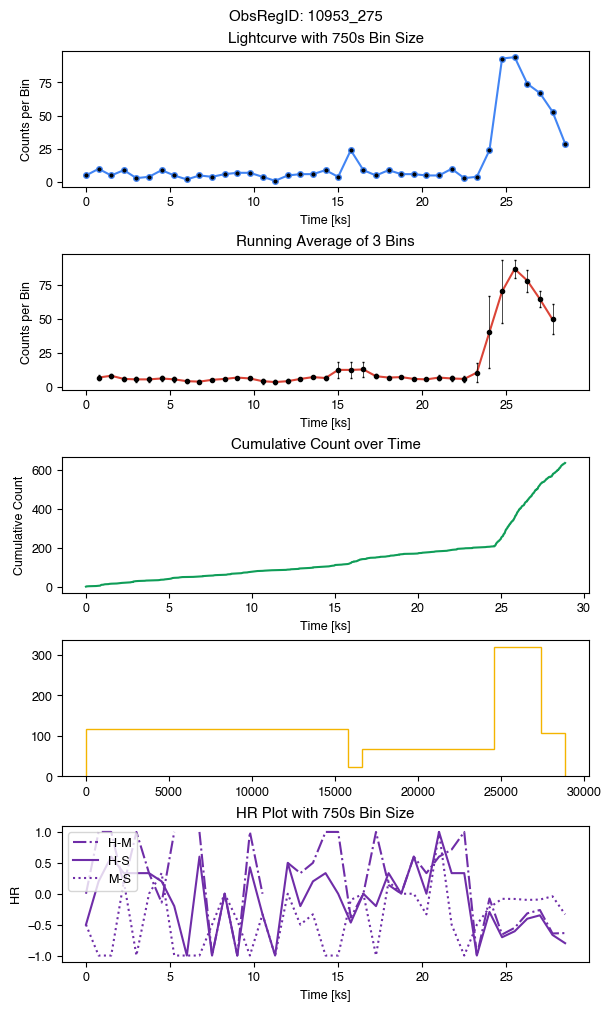

         broad_count  soft_count  medium_count  hard_count
time                                                      
0.0                1           1             0           0
2250.0             1           0             1           0
10500.0            1           0             0           1
12000.0            1           0             0           1
12750.0            1           0             0           1
         broad_count  soft_count  medium_count  hard_count  hr_hm  hr_hs  \
time                                                                       
0.0                1           1             0           0    NaN   -1.0   
2250.0             1           0             1           0   -1.0    NaN   
10500.0            1           0             0           1    1.0    1.0   
12000.0            1           0             0           1    1.0    1.0   
12750.0            1           0             0           1    1.0    1.0   

         hr_ms  hr_hm_log  hr_hs_log  hr_ms_log  
time

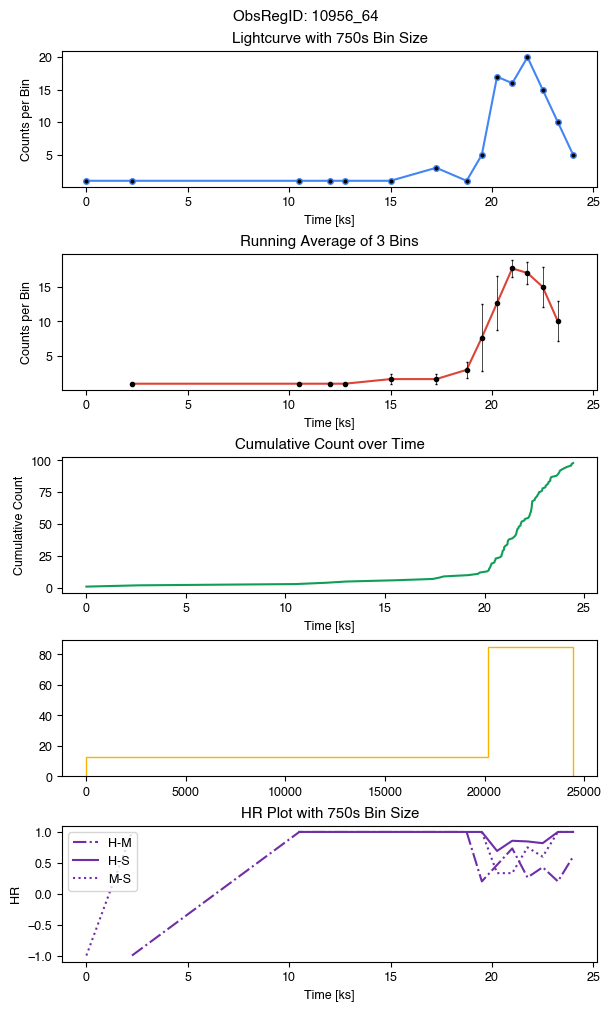

        broad_count  soft_count  medium_count  hard_count
time                                                     
0.0              17          11             4           2
750.0             7           3             3           1
1500.0            9           4             2           3
2250.0            9           5             3           1
3000.0            9           2             4           3
        broad_count  soft_count  medium_count  hard_count     hr_hm     hr_hs  \
time                                                                            
0.0              17          11             4           2 -0.333333 -0.692308   
750.0             7           3             3           1 -0.500000 -0.500000   
1500.0            9           4             2           3  0.200000 -0.142857   
2250.0            9           5             3           1 -0.500000 -0.666667   
3000.0            9           2             4           3 -0.142857  0.200000   

           hr_ms  hr_hm_lo

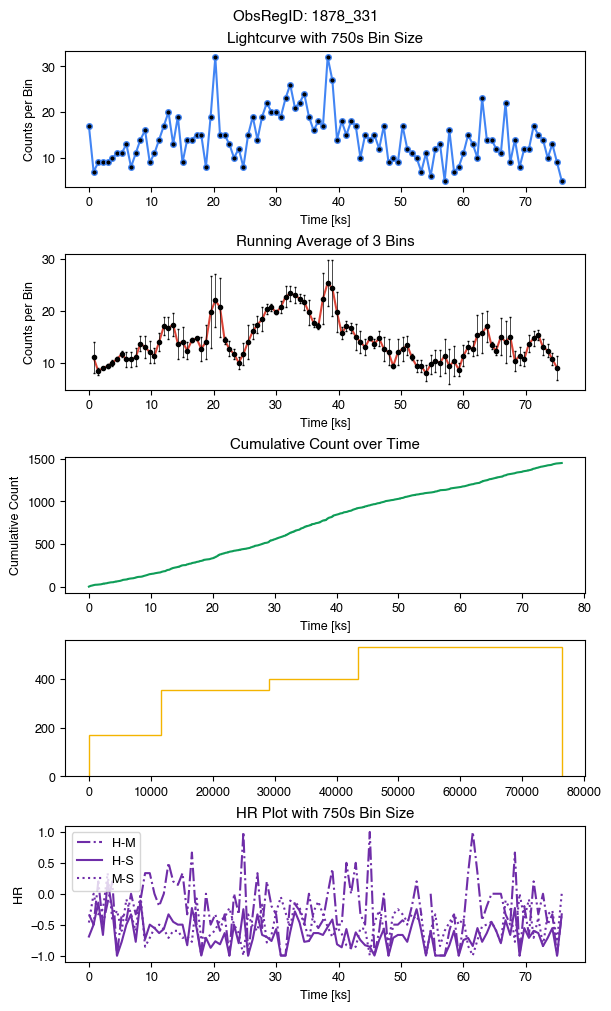

In [88]:
# 6. Lightcurve Plotter Function
def lc_plotter_fun_2(df_eventfiles_input,id_name,bin_size_sec):
    """
    DESCRIPTION: Plots lightcurves and cumulative counts for given eventfile input dataframe
    INPUT: 1. Original eventfile table, 2. Original properties table, 3. Global Path, 4. Set Name
    OUTPUT: 1. Reduced eventfile table, 2. Reduced properties table
    """
    # Define Colour Scheme
    google_blue = '#4285F4'
    google_red = '#DB4437'
    google_yellow = '#F4B400'
    google_green = '#0F9D58'
    google_purple = '#6f2da8'
    # Define Font Settings
    plt.rcParams.update({'font.size': 9})
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.rcParams['font.family'] = 'sans-serif'
    # Create subplots 
    fig, axs = plt.subplots(5, 1, figsize=(6, 10),constrained_layout = True)
    fig.suptitle(f'ObsRegID: {id_name}',fontweight="bold")
    # Prepare df
    df = df_eventfiles_input.copy()
    df['time'] = df_eventfiles_input['time'] - min(df_eventfiles_input['time'])
    df = df.sort_values(by='time') 
    df = df.reset_index(drop=True)
    # Create binned lightcurve
    df_binned = df.groupby(df['time'] // bin_size_sec * bin_size_sec).agg(
        broad_count = ('energy', lambda x: ((x >= 500) & (x <= 7000)).sum()),
        soft_count =('energy', lambda x: ((x >= 500) & (x < 1200)).sum()),
        medium_count=('energy', lambda x: ((x >= 1200) & (x < 2000)).sum()),
        hard_count=('energy', lambda x: ((x >= 2000) & (x <= 7000)).sum()))
    print(df_binned.head())
    # Plot binned lightcurve
    axs[0].plot(df_binned.index/1000, df_binned['broad_count'], color = google_blue, marker = 'o', markerfacecolor = 'black', markersize = 4)
    axs[0].set_xlabel('Time [ks]')
    axs[0].set_ylabel('Counts per Bin')
    axs[0].set_title(f'Lightcurve with {bin_size_sec}s Bin Size')
    # Create rolling 3-bin averaged lightcurved
    df_rolling = df_binned.rolling(window=3, center=True).mean()
    rolling_std = df_binned.rolling(window=3, center=True).std()
    errors = rolling_std['broad_count']/math.sqrt(3)
    errors.iloc[0] = errors.iloc[0] * math.sqrt(3)/math.sqrt(2)
    errors.iloc[-1] = errors.iloc[-1] * math.sqrt(3)/math.sqrt(2)
    # Plot rolling 3-bin averaged lightcurved
    axs[1].plot(df_rolling.index/1000, df_rolling['broad_count'], color = google_red)
    axs[1].errorbar(df_rolling.index/1000, df_rolling['broad_count'], yerr = errors, xerr = None,fmt ='.',color = "black",linewidth = .5,capsize = 1)
    axs[1].set_xlabel('Time [ks]')
    axs[1].set_ylabel('Counts per Bin')
    axs[1].set_title('Running Average of 3 Bins')
    # Create cumulative count plot
    df_cumulative = df.copy()
    df_cumulative['count'] = 1
    df_cumulative['cumulative_count'] = df_cumulative['count'].cumsum()
    # Plot cumulative count plot
    axs[2].plot(df_cumulative['time']/1000, df_cumulative['cumulative_count'],color = google_green)
    axs[2].set_xlabel('Time [ks]')
    axs[2].set_ylabel('Cumulative Count')
    axs[2].set_title('Cumulative Count over Time')
    # Create a BB plot
    bb_bins = astats.bayesian_blocks(df['time'].values, fitness='events',p0 = 0.06) # p0 = 0.01 or so BASED ON VINAY ! 6?
    # bb_bins = astats.bayesian_blocks(df['time'].values, fitness='events',ncp_prior = 4) # ncp_prior like 4 BASED ON CALEB
    # bb_bins = hepstats.modeling.bayesian_blocks.bayesian_blocks(df['time'].values,p0 = 0.05)
    counts, bins, _ =  axs[3].hist(df['time'], bins=bb_bins, color=google_yellow, histtype='step')
    # Create a HR plot
    df_hr = df_binned.copy()
    df_hr['hr_hm'] = (df_hr['hard_count']-df_hr['medium_count'])/(df_hr['hard_count']+df_hr['medium_count'])
    df_hr['hr_hs'] = (df_hr['hard_count']-df_hr['soft_count'])/(df_hr['hard_count']+df_hr['soft_count'])
    df_hr['hr_ms'] = (df_hr['medium_count']-df_hr['soft_count'])/(df_hr['medium_count']+df_hr['soft_count'])
    df_hr['hr_hm_log'] = np.log10(df_hr['hard_count']/df_hr['medium_count'])
    df_hr['hr_hs_log'] = np.log10(df_hr['hard_count']/df_hr['soft_count'])
    df_hr['hr_ms_log'] = np.log10(df_hr['medium_count']/df_hr['soft_count'])

    axs[4].plot(df_hr.index/1000, df_hr['hr_hm'], color = google_purple, label = 'H-M', linestyle='-.')
    axs[4].plot(df_hr.index/1000, df_hr['hr_hs'], color = google_purple, label = 'H-S', linestyle='-')
    axs[4].plot(df_hr.index/1000, df_hr['hr_ms'], color = google_purple, label = 'M-S', linestyle=':')
    axs[4].set_xlabel('Time [ks]')
    axs[4].set_ylabel('HR')
    axs[4].set_title(f'HR Plot with {bin_size_sec}s Bin Size')
    axs[4].legend(loc='upper left')

    # axs[5].plot(df_hr.index/1000, df_hr['hr_hs'], color = google_yellow)
    # axs[5].set_xlabel('Time [ks]')
    # axs[5].set_ylabel('HR_{hs}')
    # axs[5].set_title(f'HR Plot with {bin_size_sec}s Bin Size')

    # axs[6].plot(df_hr.index/1000, df_hr['hr_ms'], color = google_yellow)
    # axs[6].set_xlabel('Time [ks]')
    # axs[6].set_ylabel('HR_{ms}')
    # axs[6].set_title(f'HR Plot with {bin_size_sec}s Bin Size')

    print(df_hr.head())
    plt.show()
    return

df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lc_plotter_fun_2(dfi,id_name,750)
    

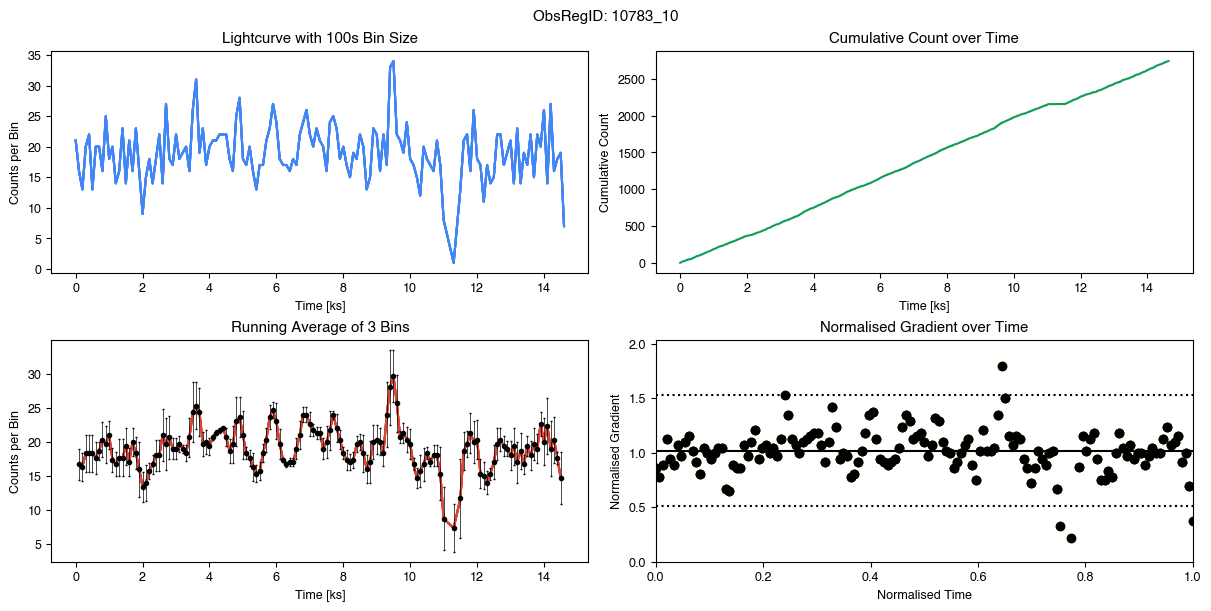

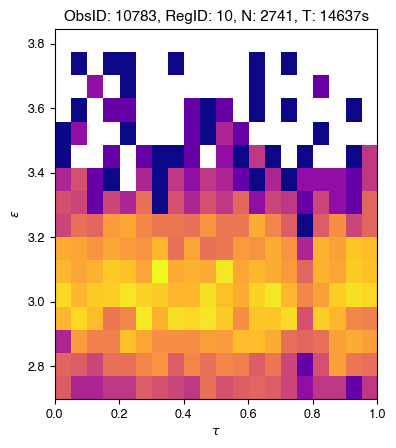

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


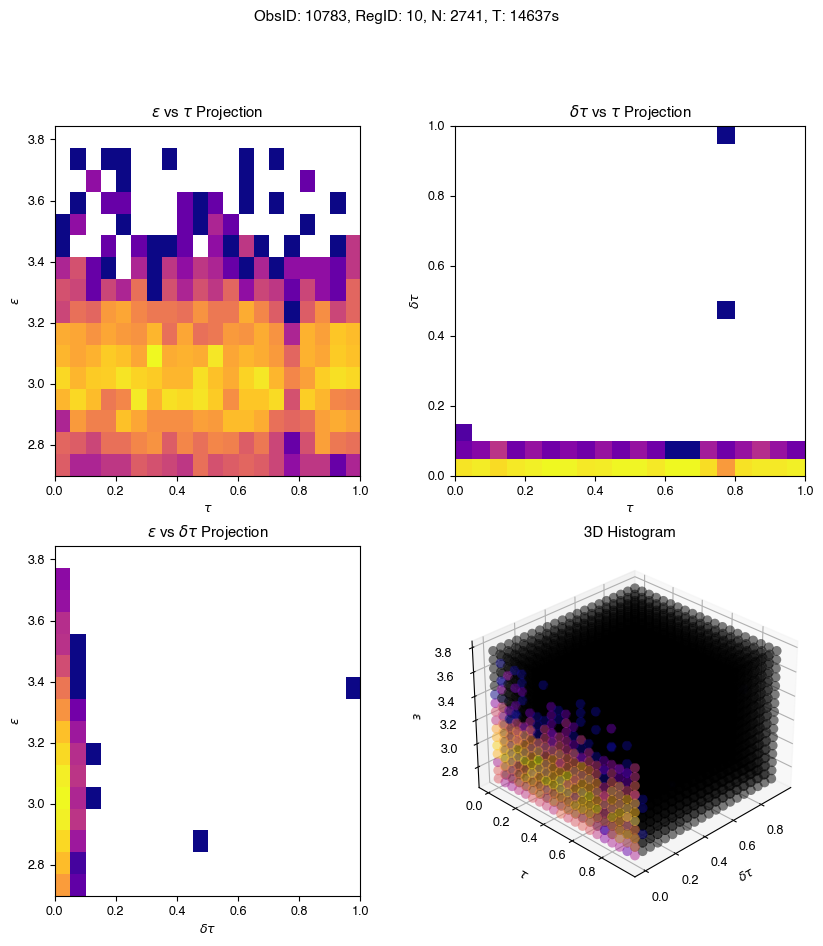

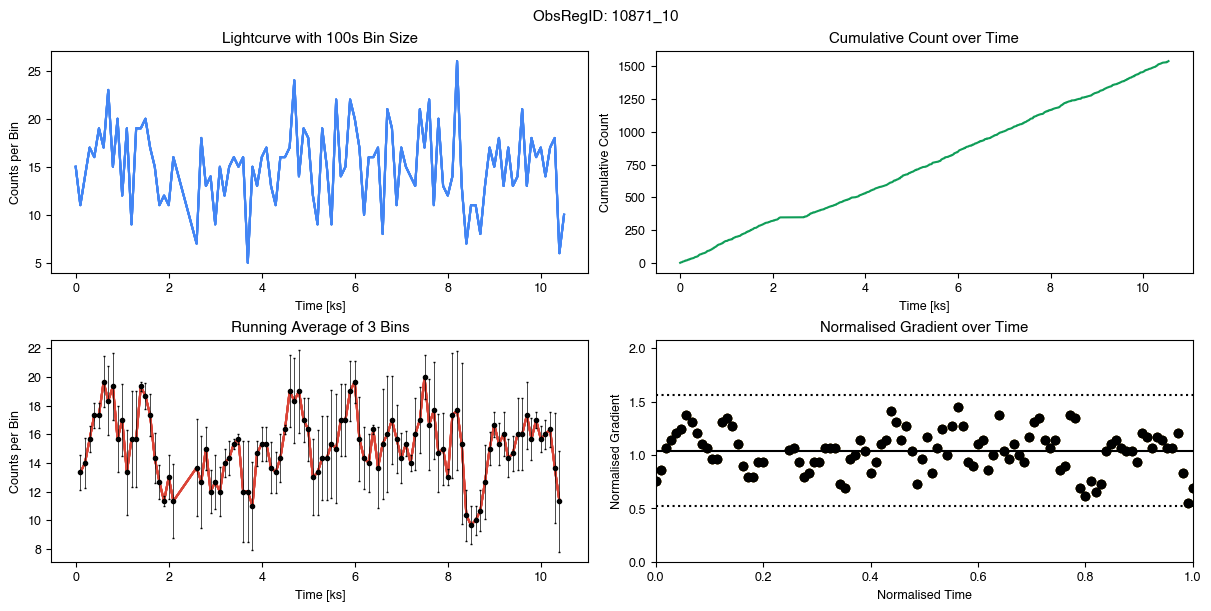

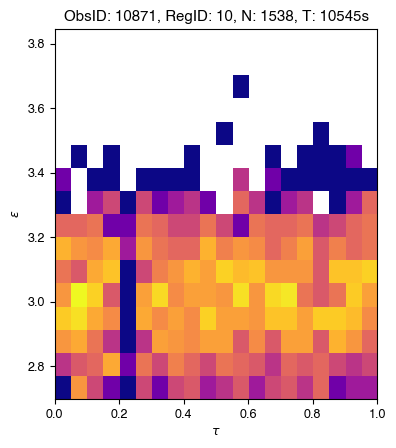

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


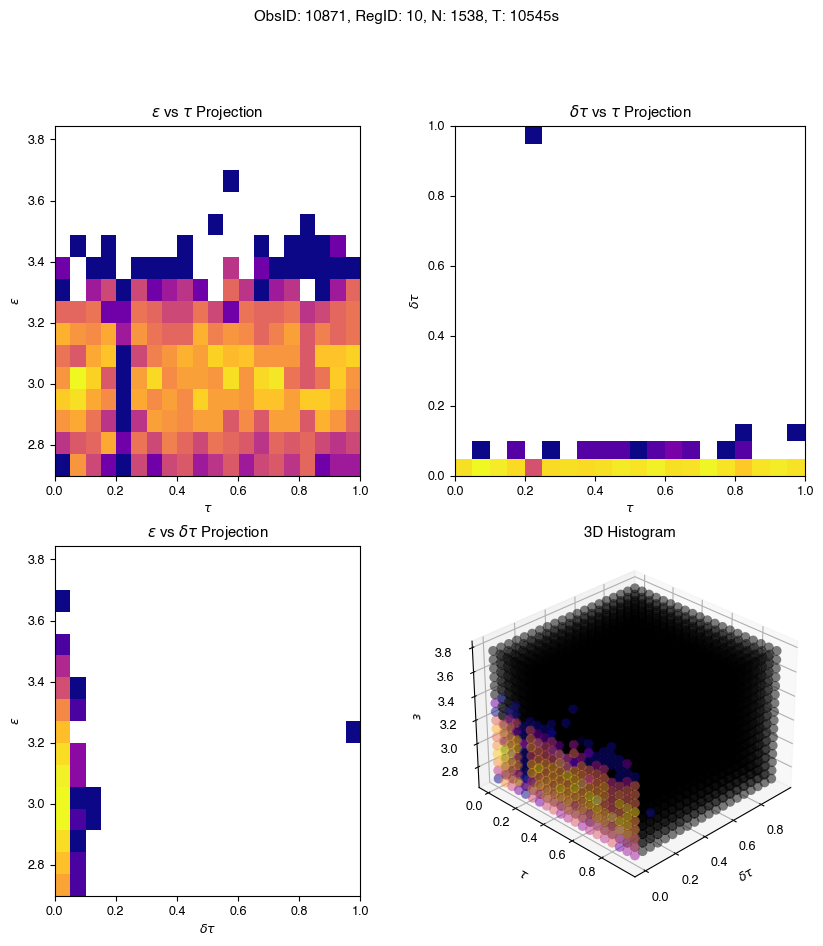

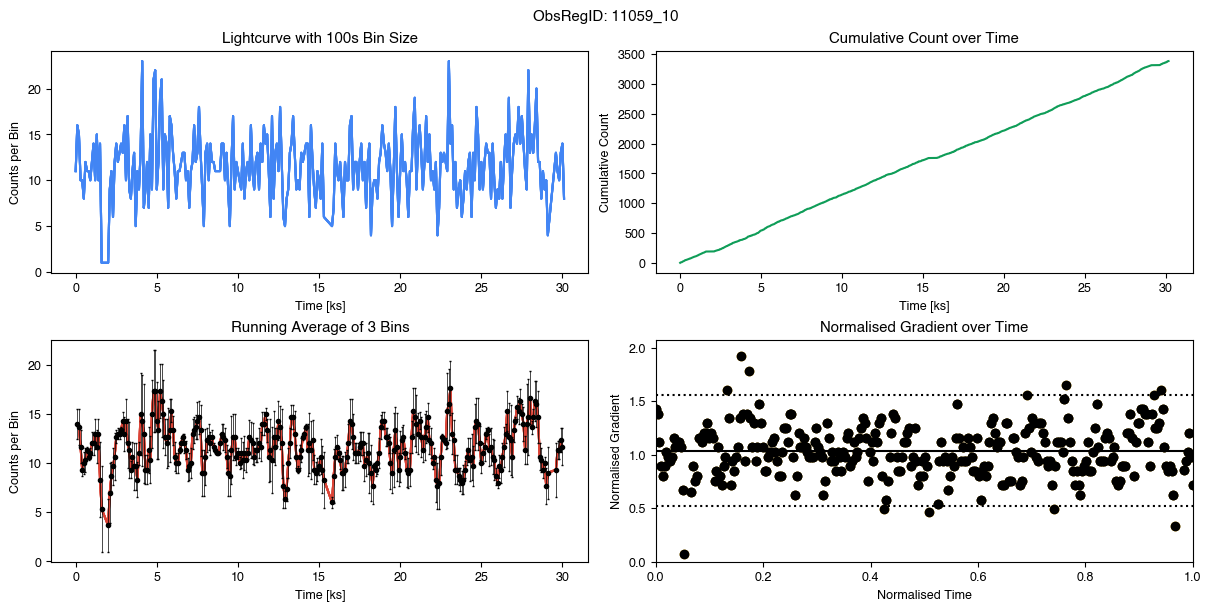

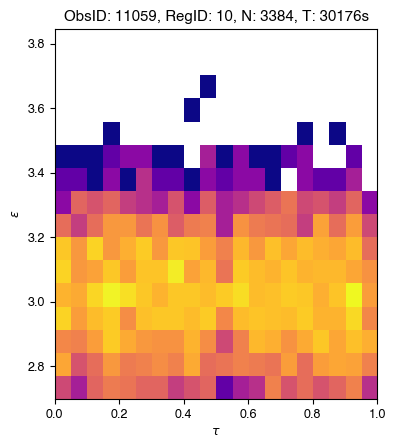

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


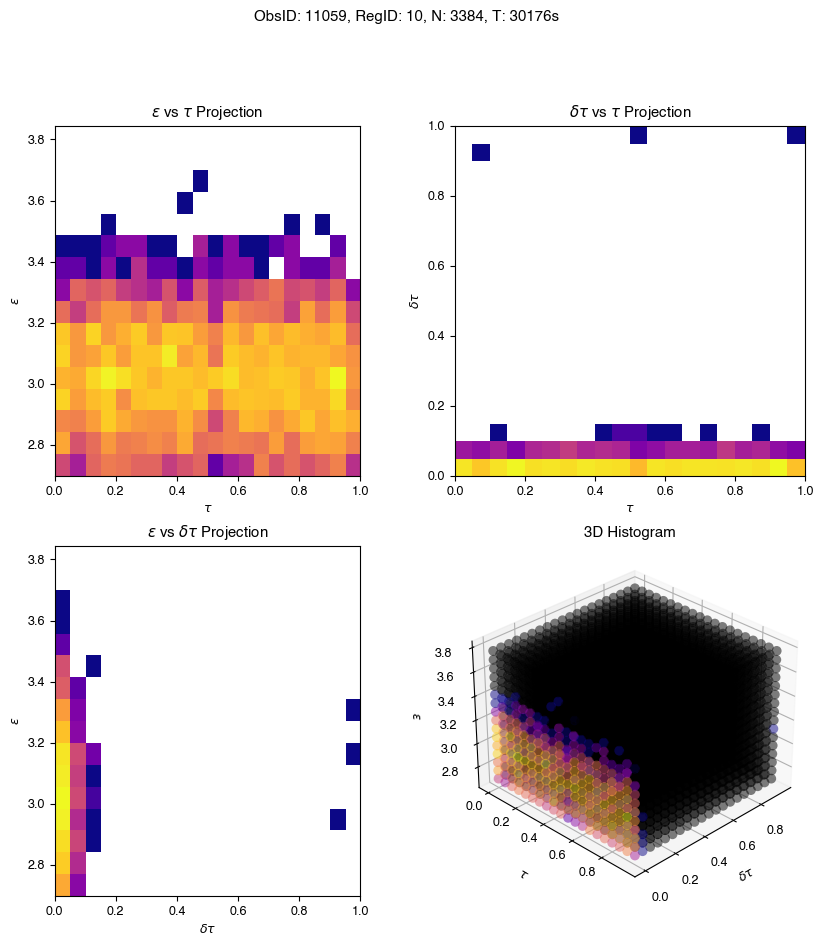

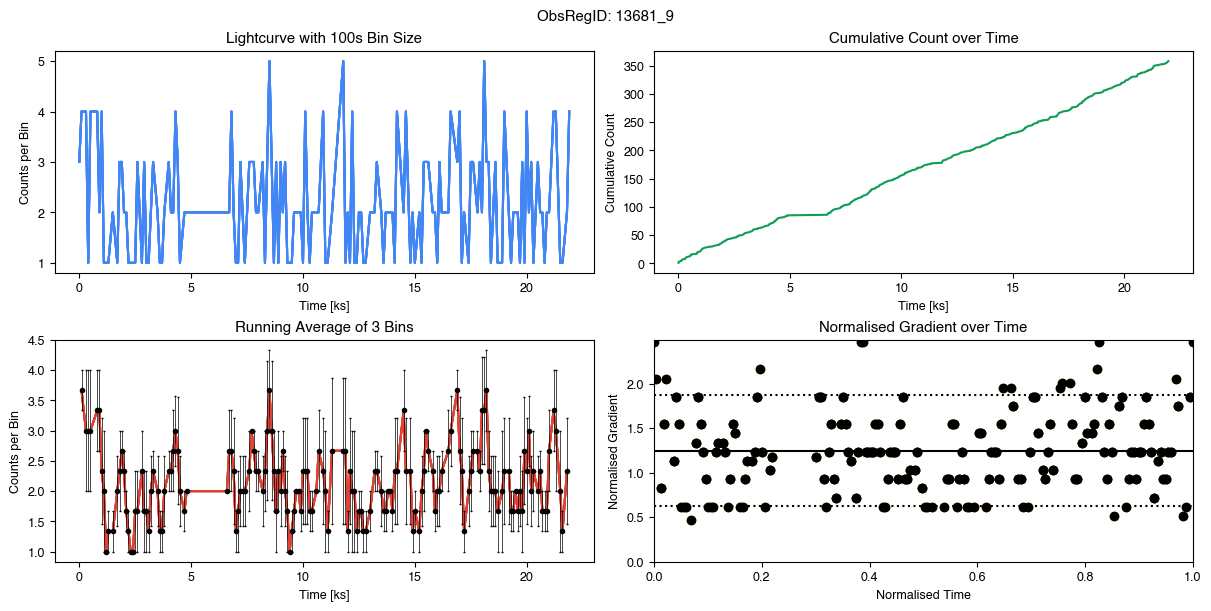

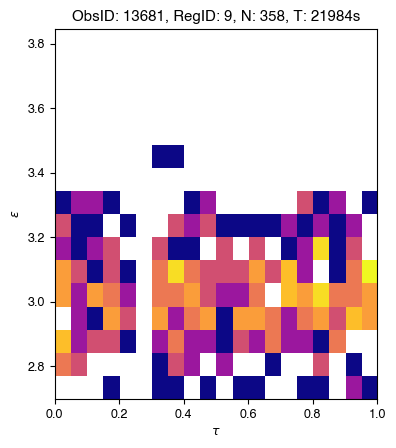

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


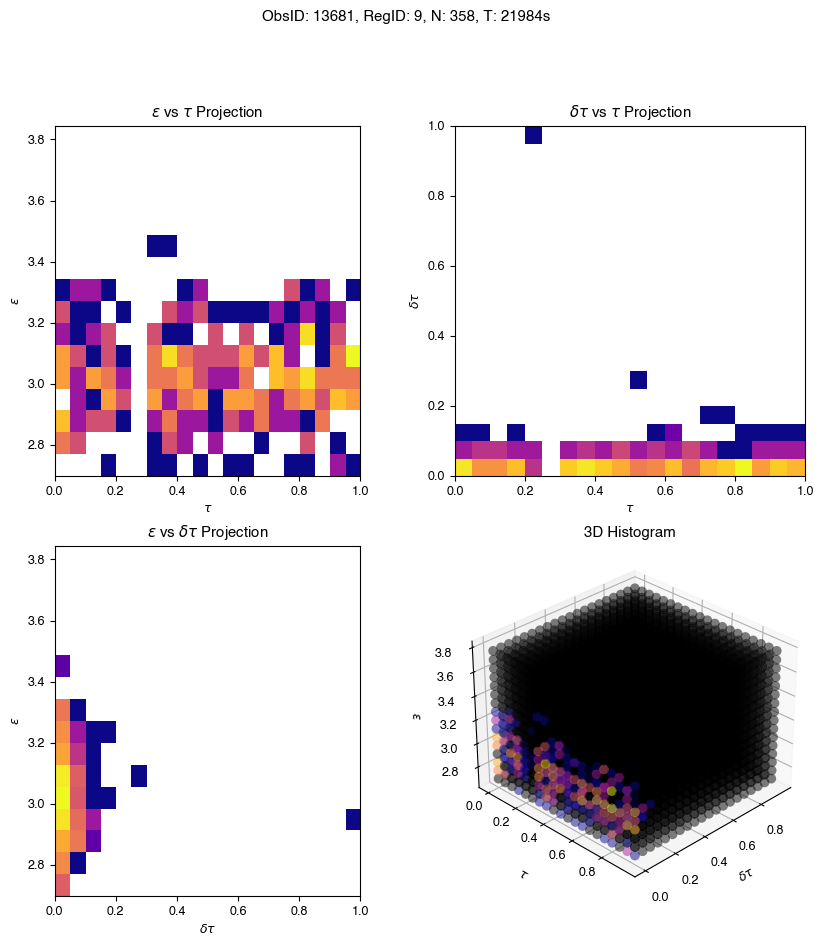

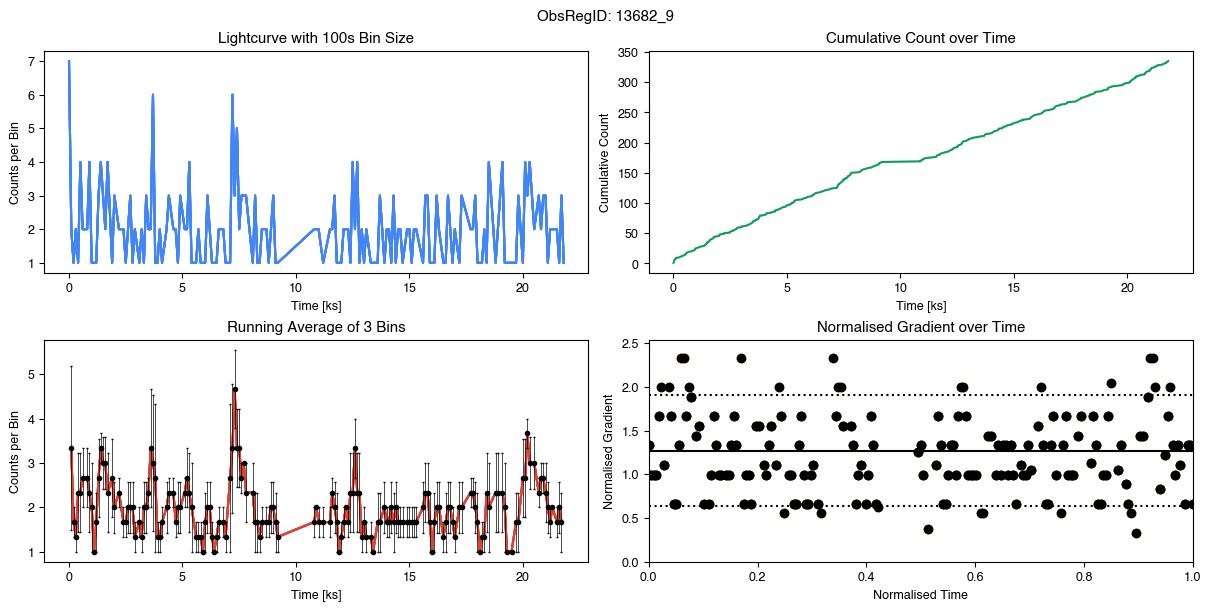

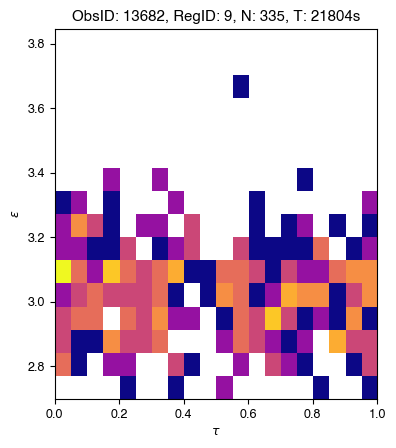

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


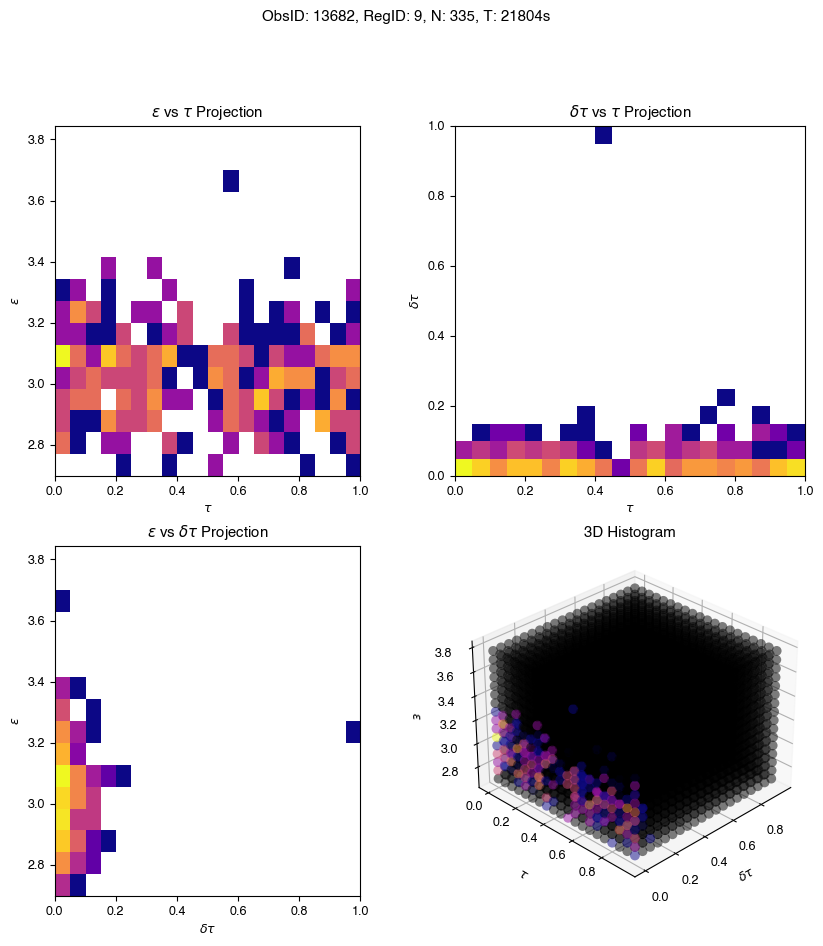

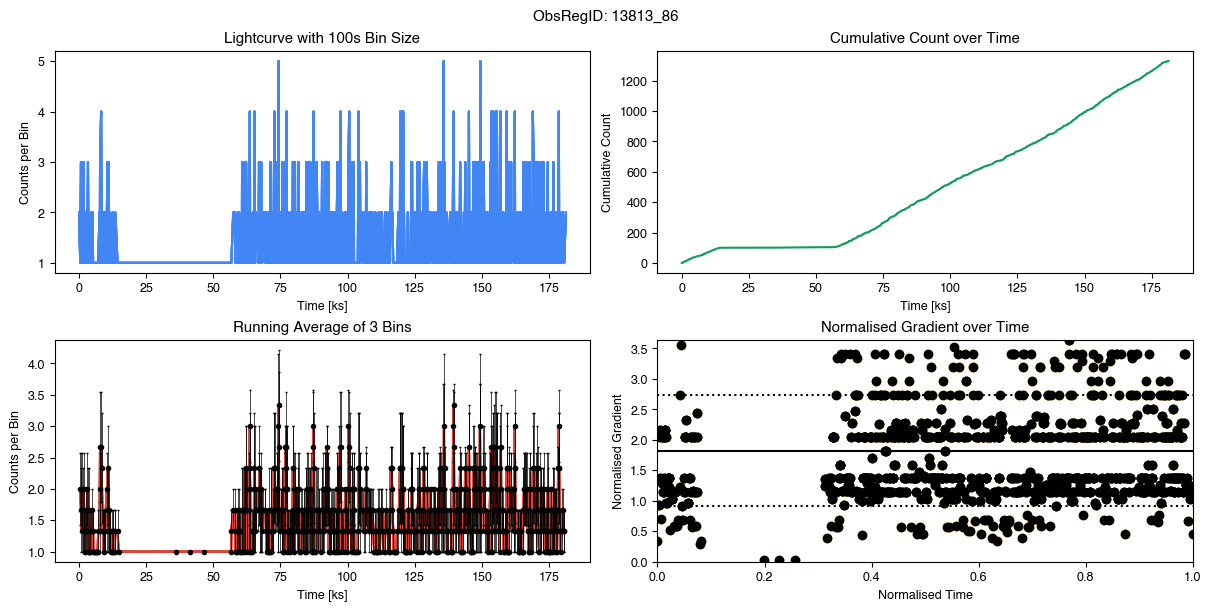

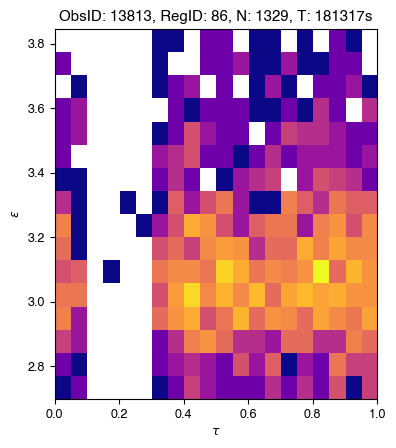

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


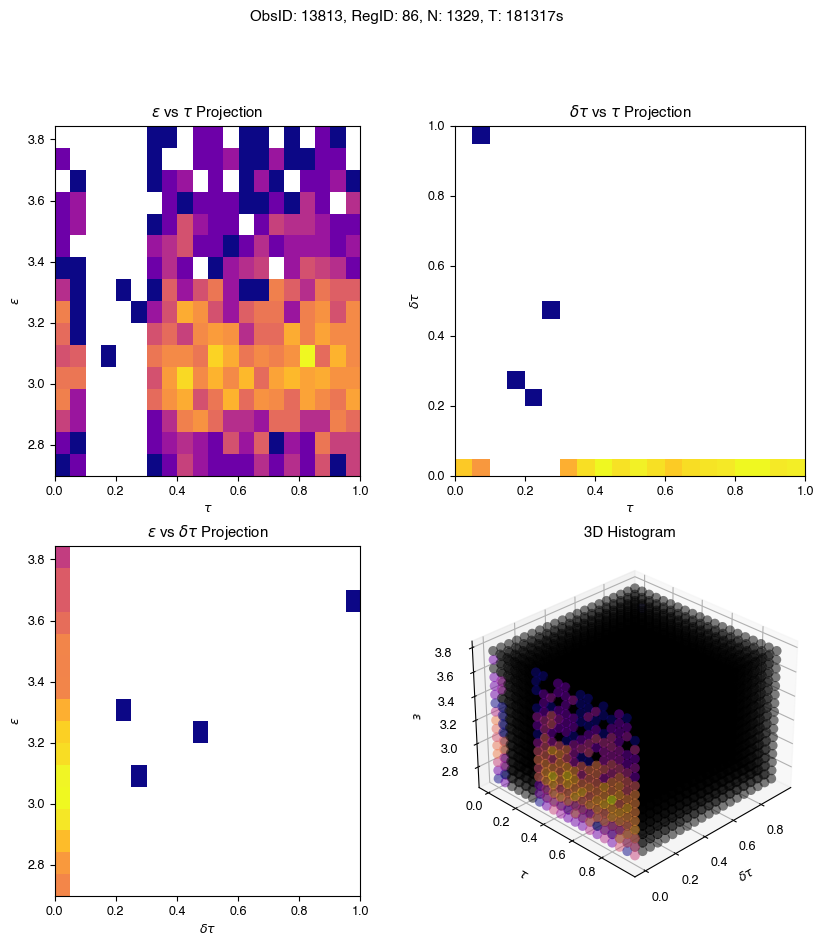

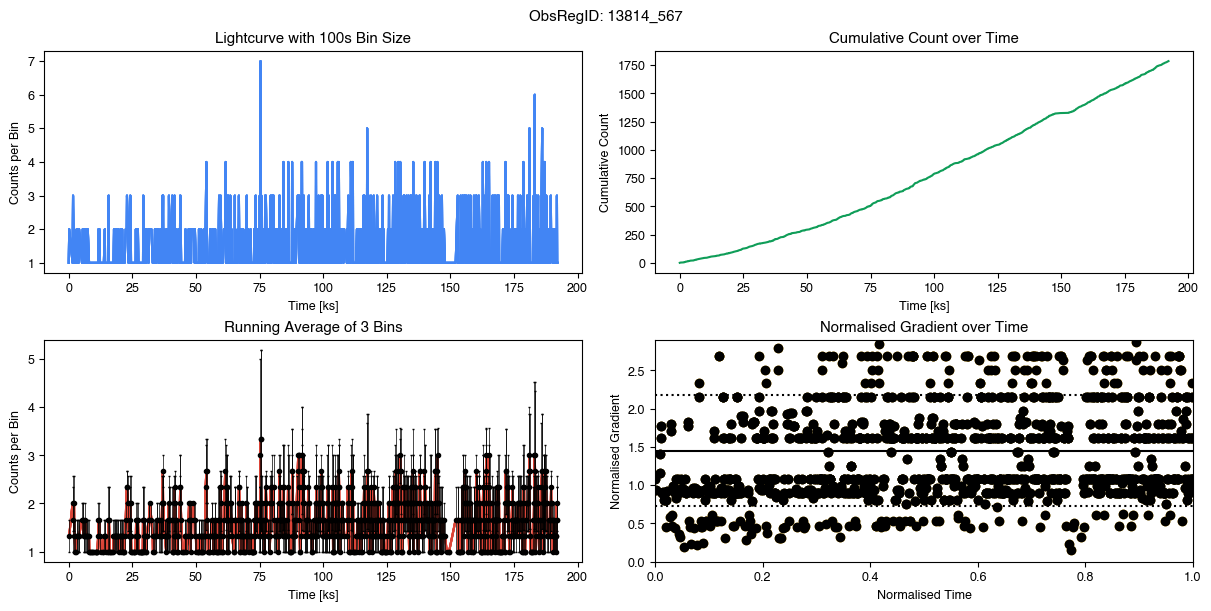

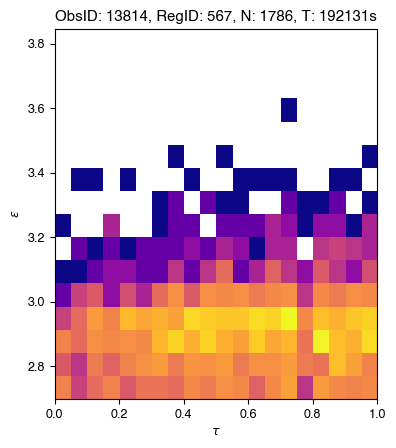

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


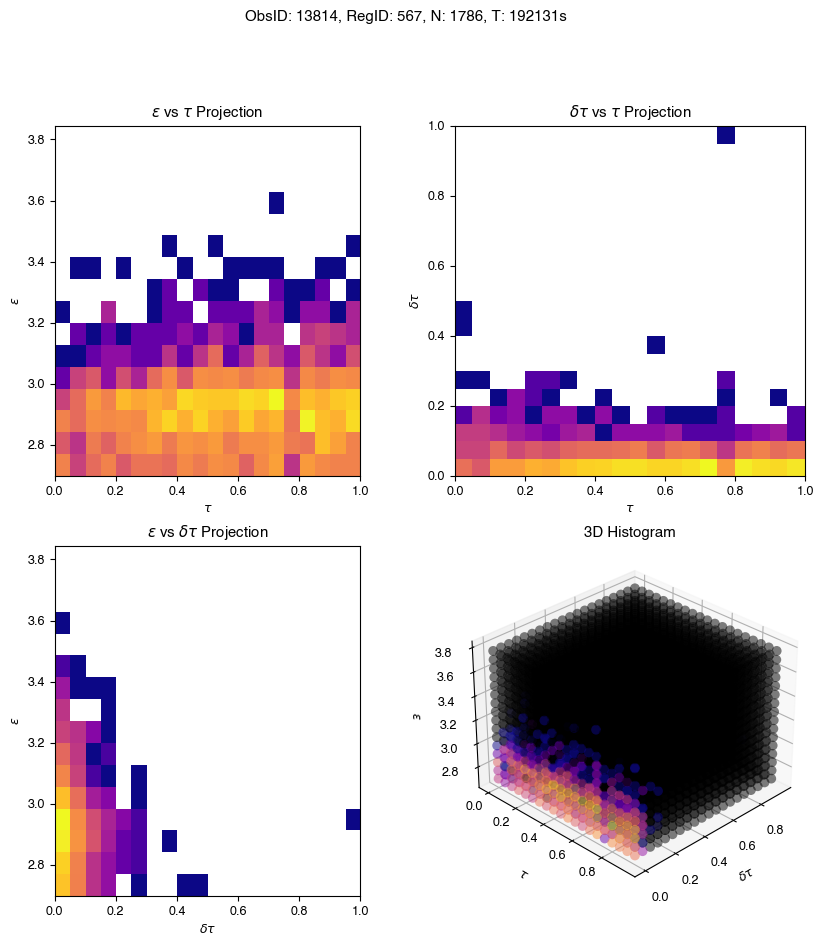

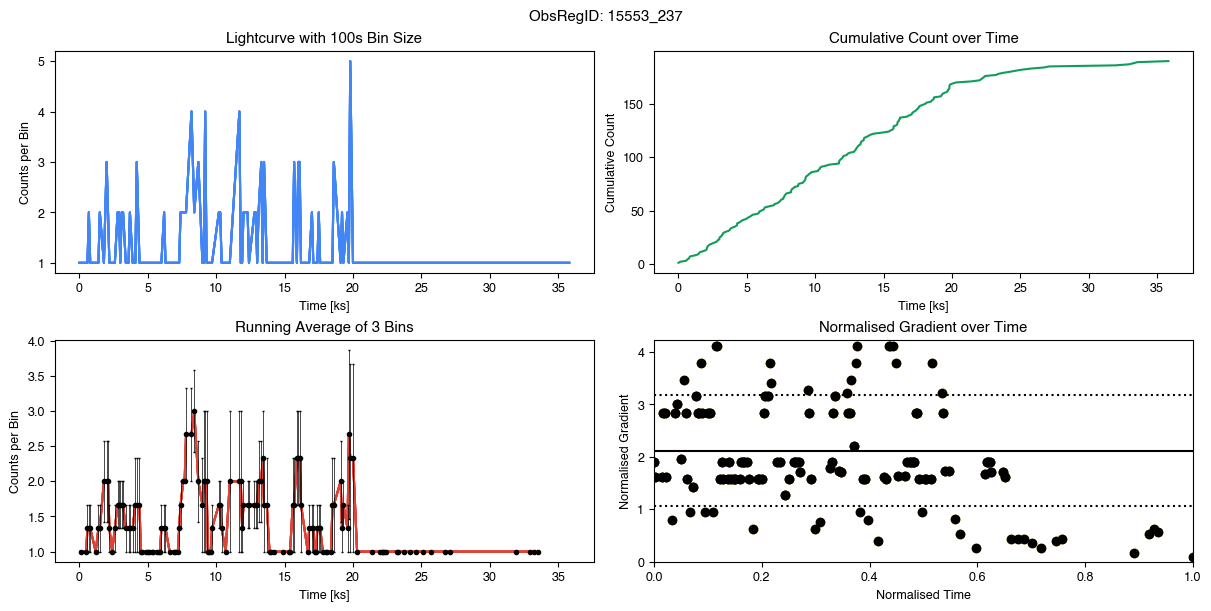

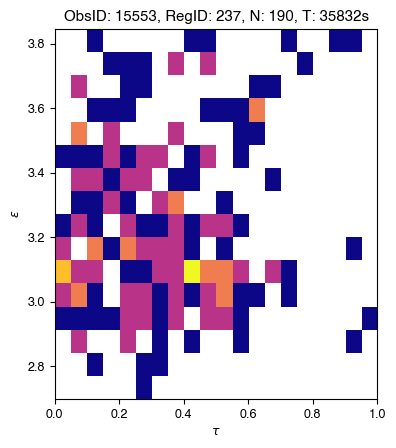

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


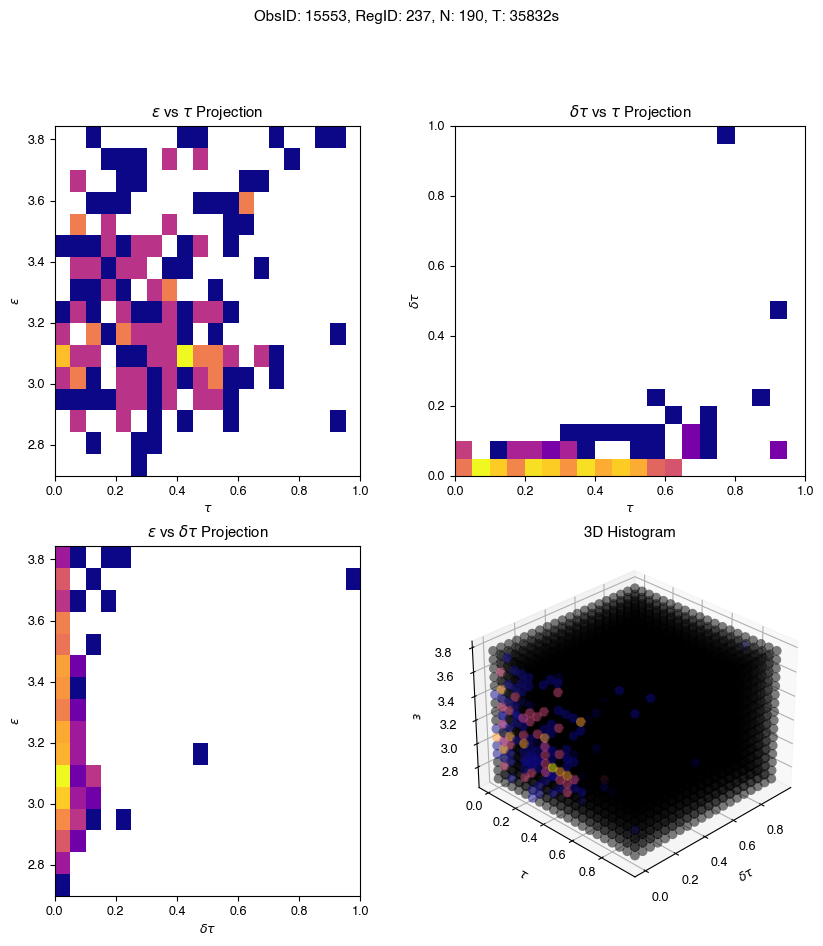

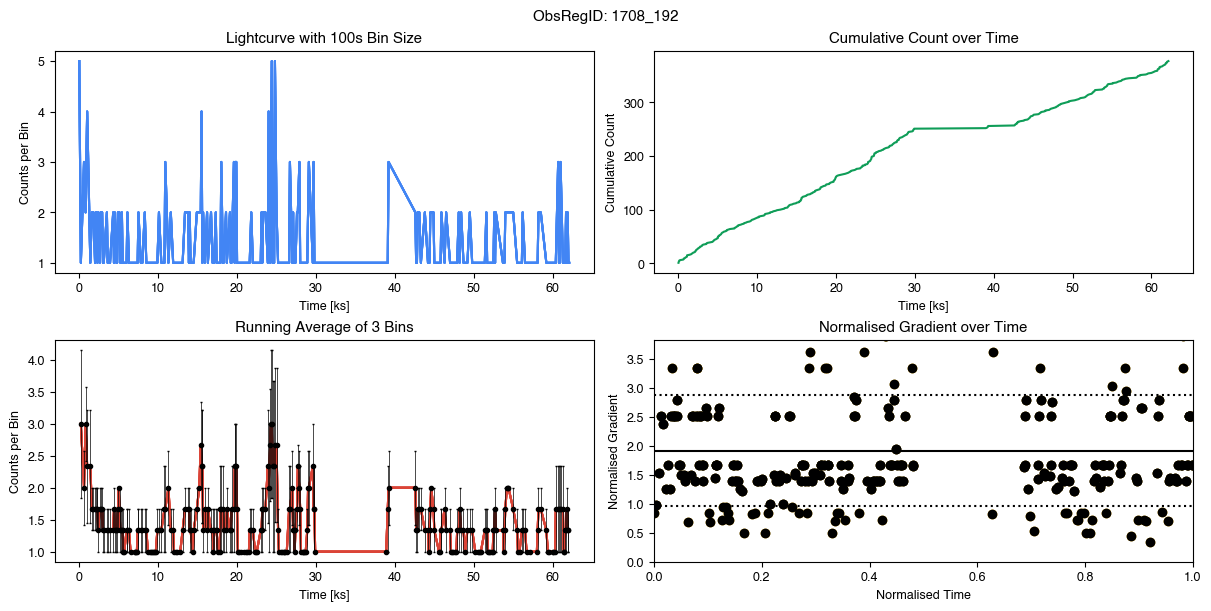

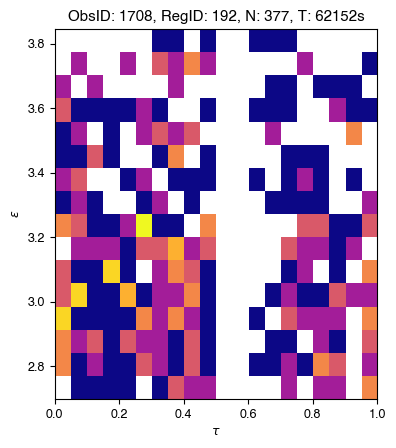

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


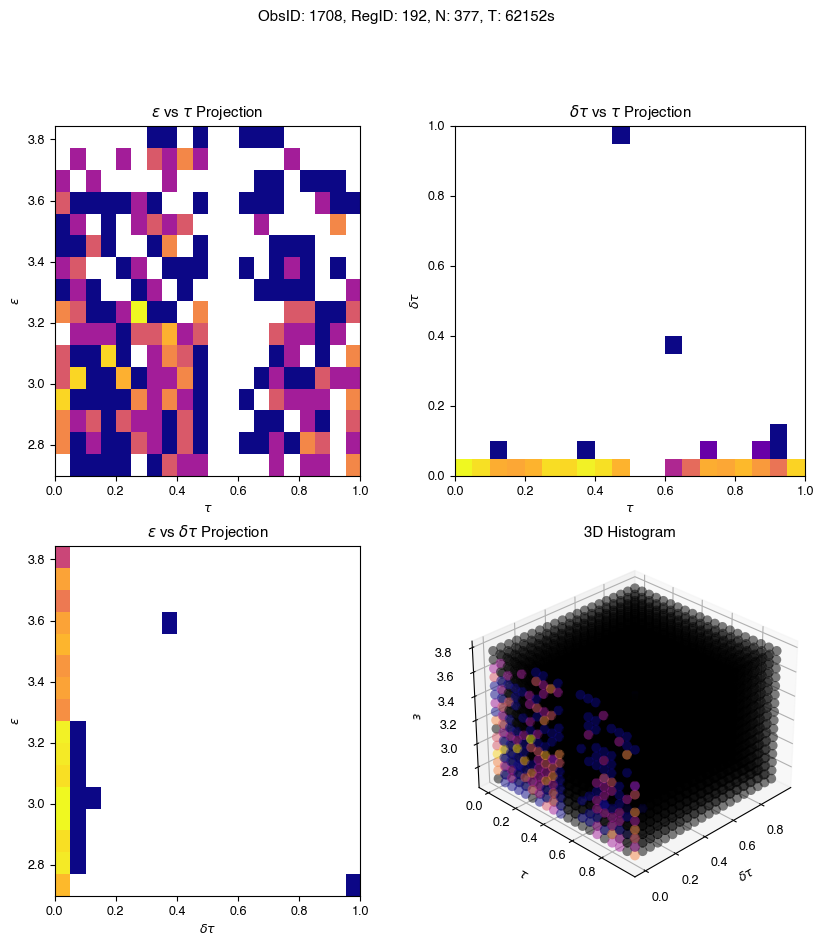

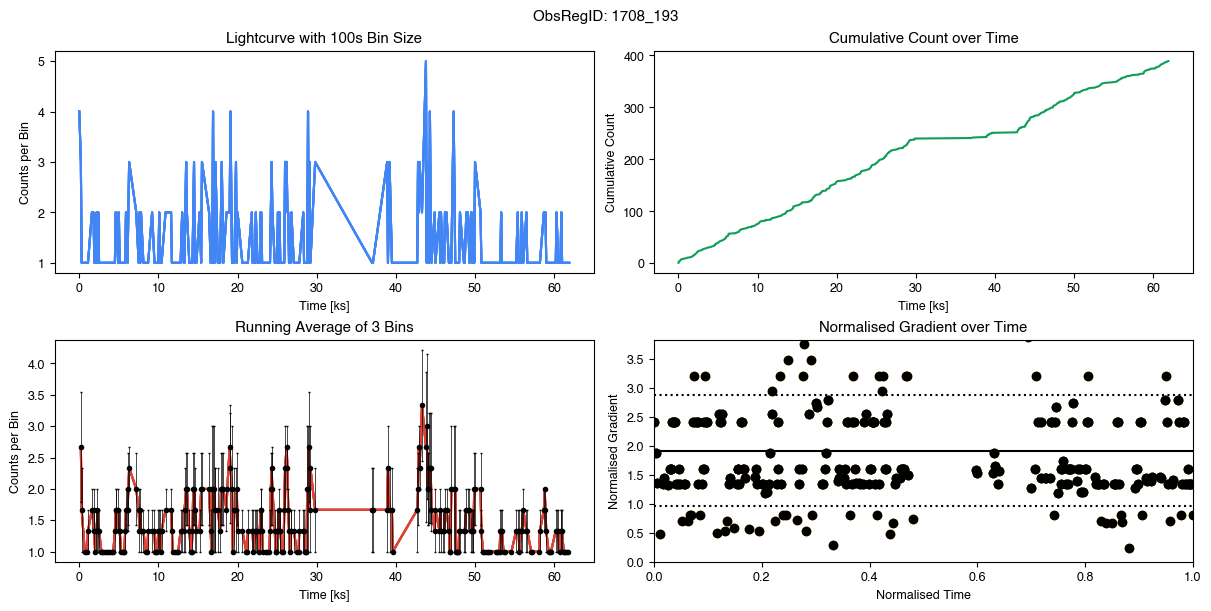

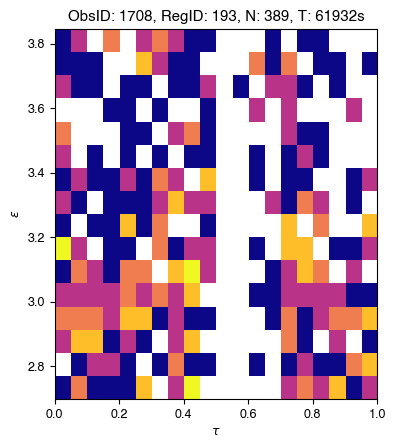

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


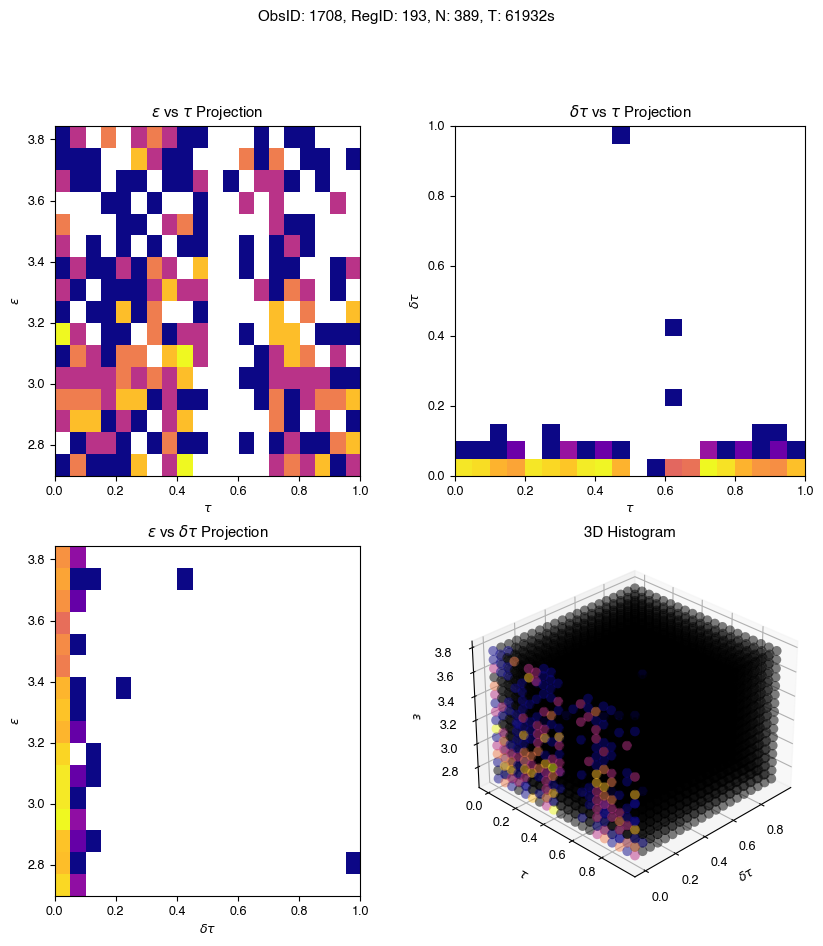

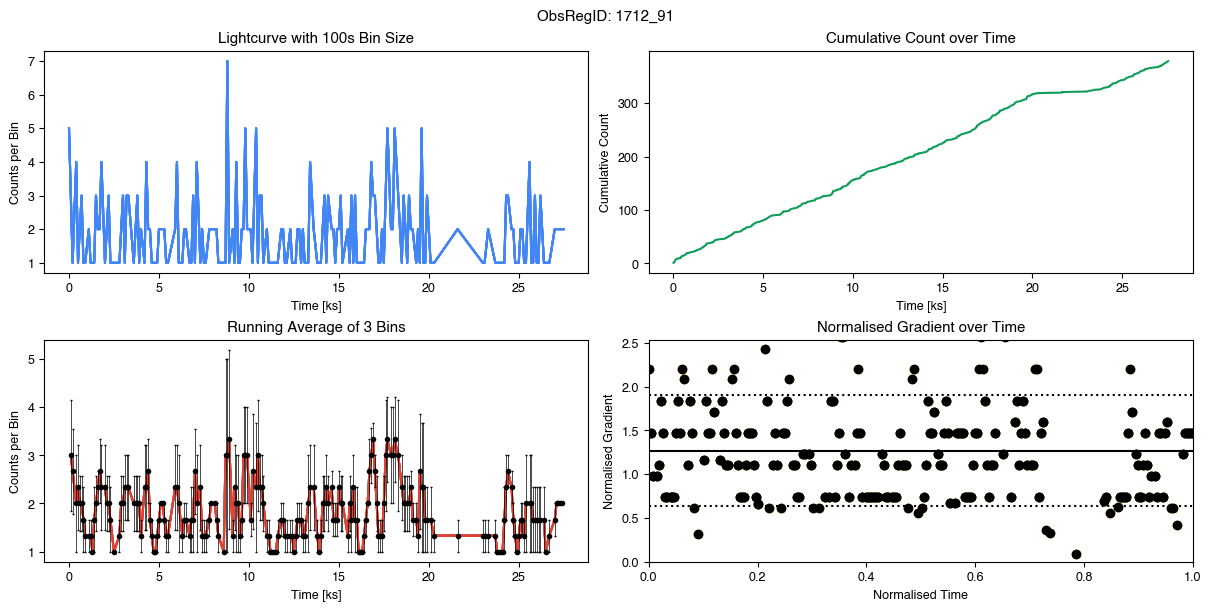

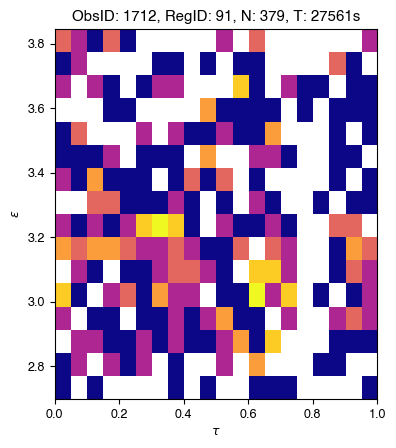

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


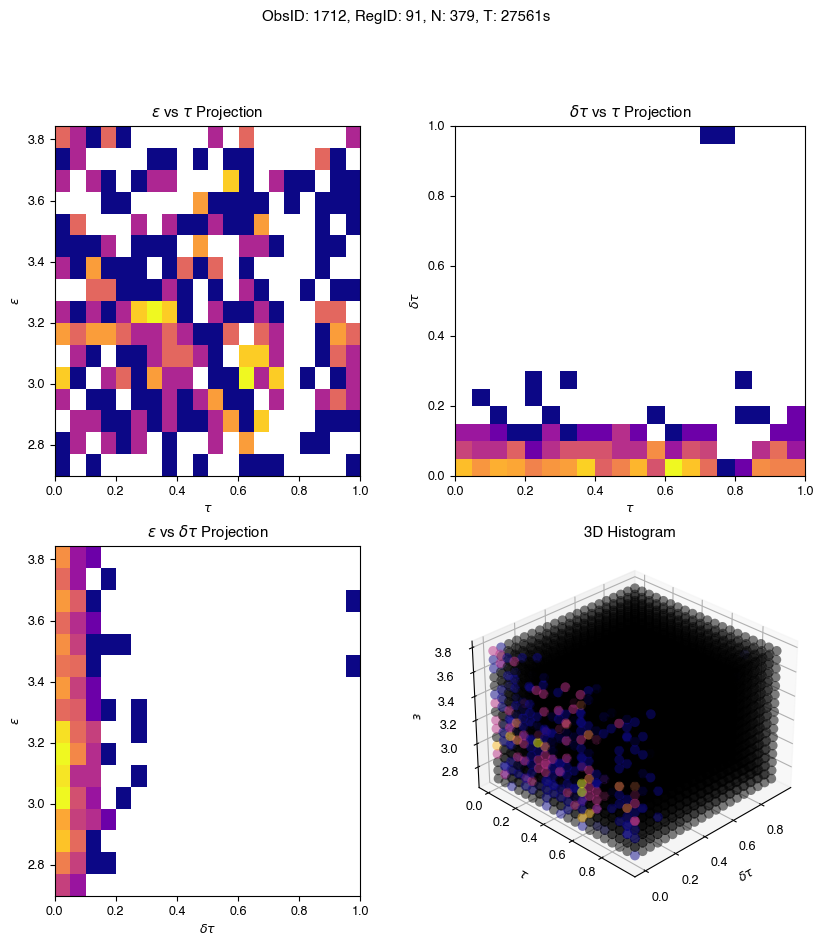

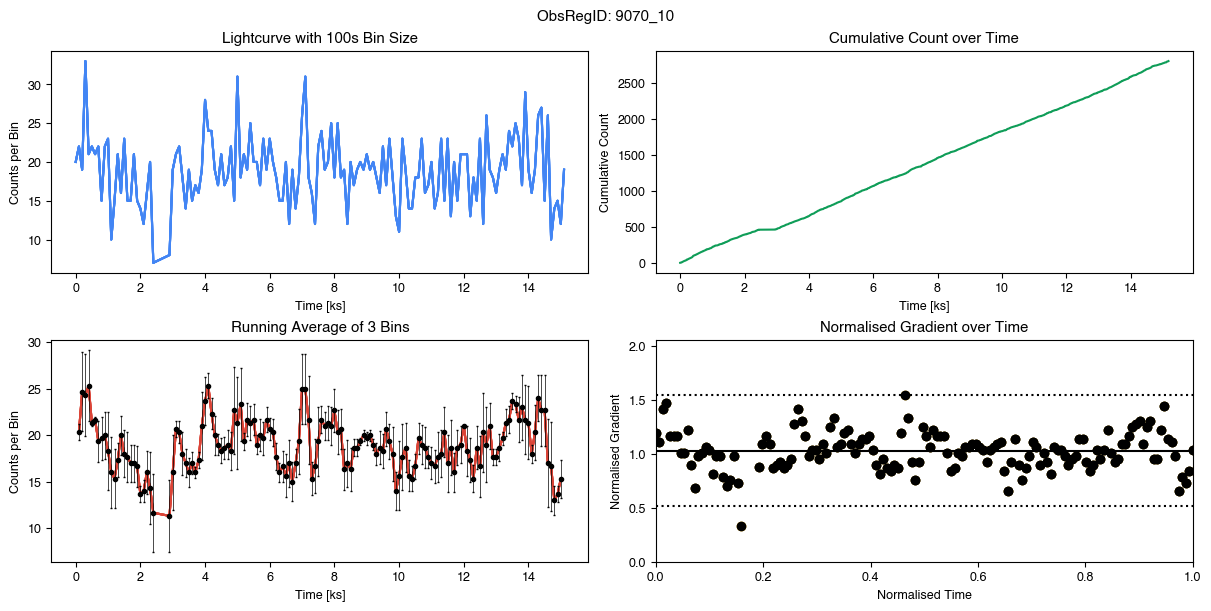

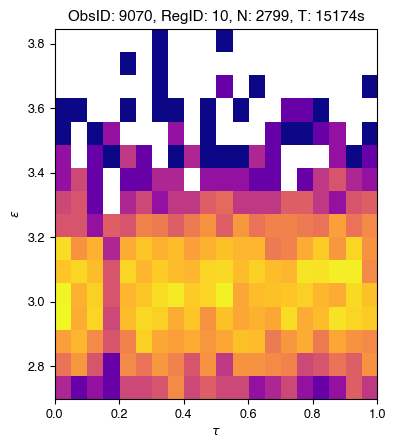

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


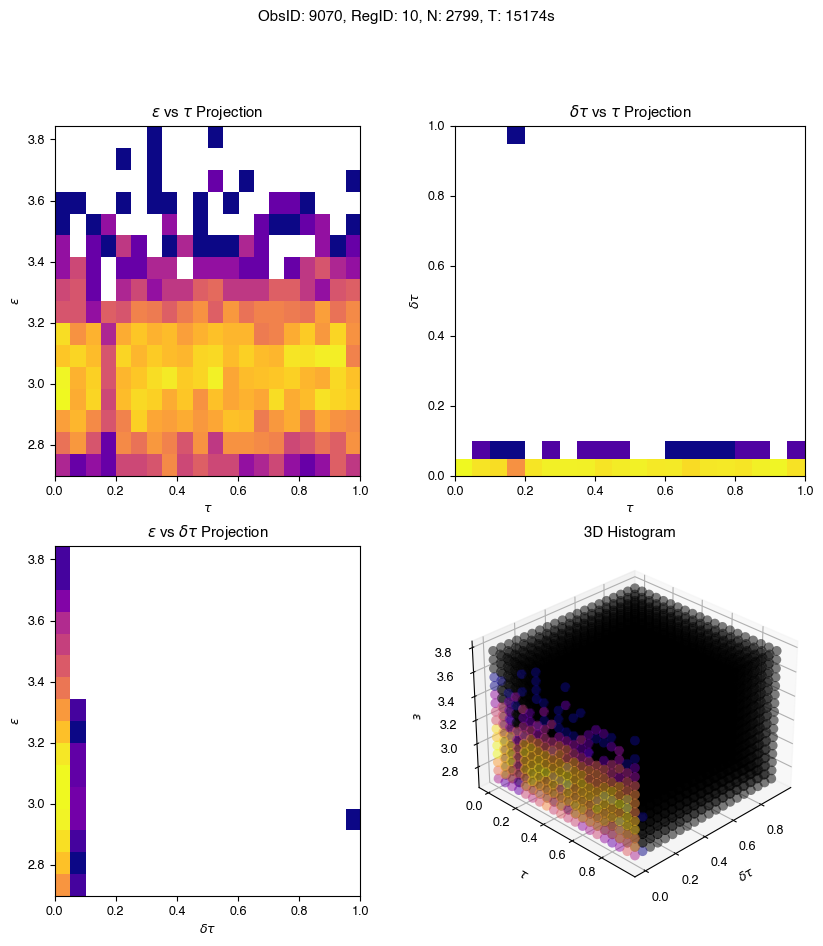

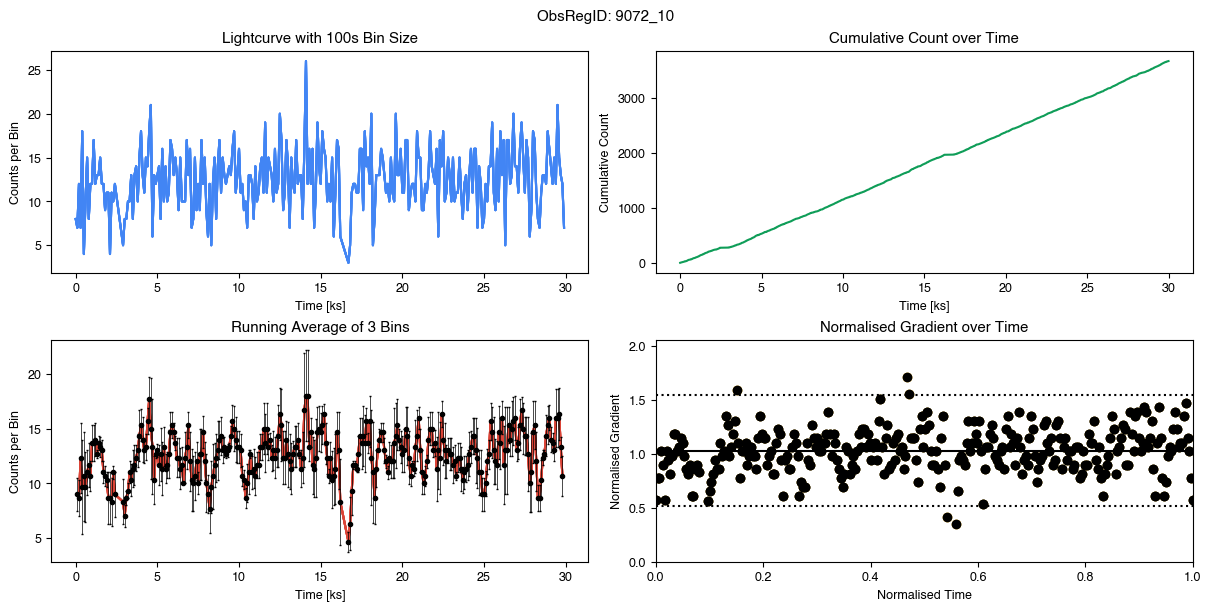

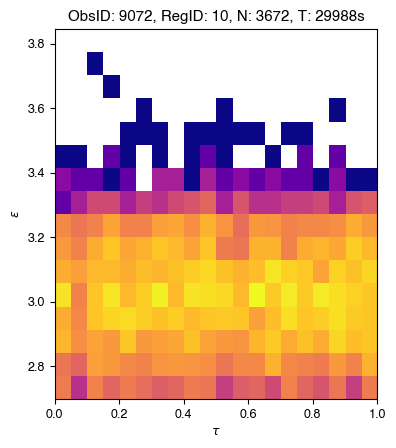

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


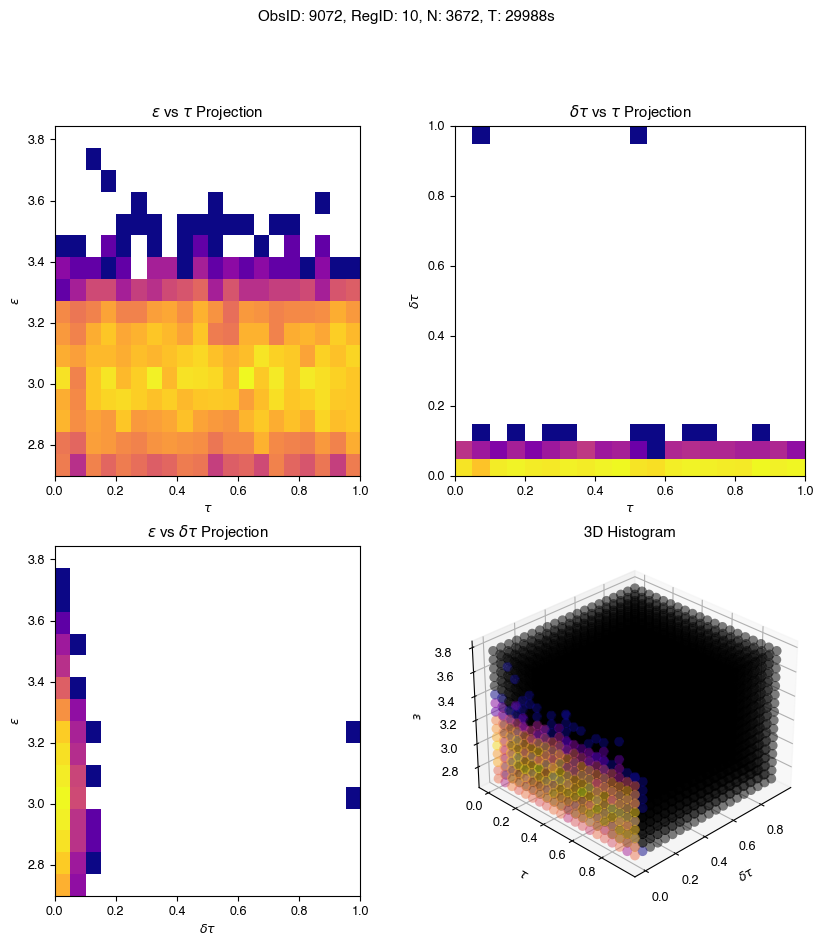

In [12]:
nE = 16
nt = 20
ndt = 20

df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lc_plotter_fun(dfi,id_name,100)
    hist2D_Et(dfi, id_name,nE, nt,norm = 'minmax',plot=True)
    hist3D(dfi, id_name, nE, nt,ndt,plot=True)

In [12]:
count_limit = df_eventfiles_group.ngroups
count = 0
for id_name, dfi in df_eventfiles_group:
    hist2D_img(dfi, id_name, savefolder = f'{global_path}/{set_id}/Images', norm = 'minmax', plot = False, colmap = 'plasma')
    count = count+1
    

/var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/ipykernel_924/2948816434.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


: 

: 